# **Assignment 5: Consumer segmentation using PCA**

### **1. Import, scale, and summarize the data. (1 point)**

In [2]:
import pandas as pd 

df = pd.read_csv("Questionaire data.csv")

df.head()

,Resp,X1,X2,X3,X4,X5
0,1,6,0,8,4,4
1,2,4,9,2,8,9
2,3,2,8,2,6,9
3,4,5,7,3,9,6
4,5,3,8,3,9,6


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #creating an “empty scaler object”, like creating a calculator
X_scaled = scaler.fit_transform(df) # .fit learns the means / standrad deviation and then .transform applies z = X−mean / sd   

# X scaled is a Numpy array thus we convert it to DataFrame for clarity
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
df_scaled.head()


,Resp,X1,X2,X3,X4,X5
0,-1.675247,0.552931,-1.706482,1.605061,-0.489698,-0.190368
1,-1.559712,-0.138233,1.285402,-0.617331,0.909439,1.594335
2,-1.444178,-0.829396,0.952971,-0.617331,0.209871,1.594335
3,-1.328644,0.207349,0.620539,-0.246932,1.259224,0.523513
4,-1.213110,-0.483814,0.952971,-0.246932,1.259224,0.523513


In [6]:
df_scaled.describe()

,Resp,X1,X2,X3,X4,X5
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,1.480297e-17,-1.628327e-16,-1.221245e-16,4.440892e-17,-8.511710e-17,4.440892e-17
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.675247e+00,-1.520560e+00,-1.706482e+00,-1.358128e+00,-1.888836e+00,-1.618131e+00
25%,-8.376234e-01,-8.293962e-01,-8.754034e-01,-6.173310e-01,-1.014375e+00,-9.042494e-01
50%,0.000000e+00,2.073491e-01,2.881074e-01,-2.469324e-01,2.098706e-01,-1.903683e-01
75%,8.376234e-01,8.985126e-01,8.698628e-01,7.716637e-01,9.094394e-01,5.235128e-01
max,1.675247e+00,1.589676e+00,1.285402e+00,1.975459e+00,1.259224e+00,1.594335e+00


### **2. Present the matrix of correlations for the five variables (X1-X5) and plot the correlations. Explain (in words) your inferences based on this exploratory analysis. (1 point)**

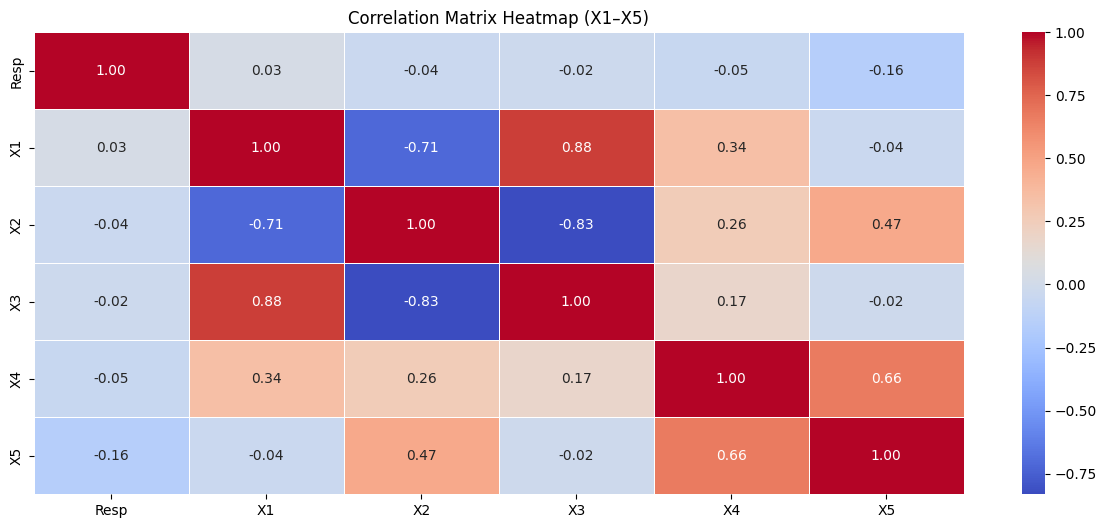

In [9]:
# correlation matrix
corr_matrix = df.corr()
corr_matrix

# plot it 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (X1–X5)")
plt.show()

**Interpretation of the correlation matrix**

The correlation matrix reveals two clear clusters of related attitudes. First, X1 (“I never go back to a store that treated me with disrespect”) and X3 (“I greatly appreciate a salesperson who spends time answering my questions”) are strongly positively correlated (0.88). This suggests a group of consumers who are highly sensitive to respectful, attentive service and value personal interaction when shopping.

In contrast, X2 (“I find salespeople who fawn over me irritating”) is strongly negatively correlated with both X1 (–0.71) and X3 (–0.83). Consumers who dislike salesperson interaction tend to care less about respectful treatment or assistance. This indicates an opposite attitude profile centered on independence and minimal service.

Additionally, X4 (“I care little for fancy displays”) and X5 (“Discount stores are more of a bargain”) are moderately positively correlated (0.66), pointing toward a segment that is price-driven and uninterested in premium store environments.

Overall, the matrix shows meaningful relationships between variables, with two underlying attitude patterns emerging: one related to service-seeking behavior and another related to value orientation. These correlations justify using PCA, since the variables are not independent and can likely be summarized into a smaller number of latent dimensions.

### **3. Perform PCA on the data and show the results (including the summary of the PCA and the matrix showing the relationship between the factors and original attributes). (1 point)**

Personal note : PCA does not create clusters of consumers or hard groups of variables; it uses correlation patterns to construct a few new summary dimensions that concentrate the information, which we can then use to visualize or cluster consumers more easily.

In [11]:
from sklearn.decomposition import PCA

# PCA object
pca = PCA()

pca.fit(df_scaled) # fitting PCA on scaled data

pca_scores = pca.transform(df_scaled) # transforming the data

import numpy as np

print("Explained variance (eigenvalues):")
print(pca.explained_variance_)

print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

print("\nCumulative variance ratio:")
print(np.cumsum(pca.explained_variance_ratio_))


Explained variance (eigenvalues):
[2.76538824 1.93915549 1.02199036 0.34177199 0.0966115  0.04197897]

Explained variance ratio:
[0.44553477 0.31241949 0.164654   0.05506326 0.01556519 0.00676328]

Cumulative variance ratio:
[0.44553477 0.75795427 0.92260827 0.97767153 0.99323672 1.        ]


In [12]:
# PCA loadings (components)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(df.columns))],
    index=df.columns
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Resp,0.031376,-0.157837,0.977991,0.131654,-0.017034,0.003811
X1,0.553862,0.231719,0.069301,-0.269679,0.724635,-0.192143
X2,-0.571199,0.201195,0.079972,-0.174659,0.463400,0.617747
X3,0.578083,0.163952,-0.039248,0.305412,-0.187706,0.713365
X4,0.013896,0.673037,0.174604,-0.551631,-0.458667,-0.040856
X5,-0.177796,0.633289,0.017582,0.694162,0.119440,-0.266265
